In [3]:
import torch
import torch.nn.functional as F

from torch import nn
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms import Resize, Compose, ToTensor, Normalize

import argparse
import os
import math 
import skimage
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import time
import pickle

from datetime import datetime
from pathlib import Path

# from data_classes.py_files.custom_datasets import *
# from data_classes.py_files.data_classes import *
from py_files.new_dataset import *

from py_files.cnn_model import *
from py_files.pigan_model import *

from py_files.pi_gan_functions import *

# %matplotlib qt

Imported CNN and Mapping functions.
Imported PI-Gan model.
Loaded all helper functions.


In [4]:
def show_runs(requirements, print_vars, last=None):
    runs = sorted(os.listdir(path='saved_runs'))
    
    if last: 
        runs = runs[-last:]
        
    for run in runs:
        ARGS = load_args(run, print_changed=False)

        if all([requirements[key] == vars(ARGS)[key] for key in requirements.keys()]):

            print(f"\n{run}\n")

            if print_vars:
                for key in print_vars:
                    if key in vars(ARGS).keys():
                        print(f"{key}: {vars(ARGS)[key]}")
            else:
                for key, item in vars(ARGS).items():
                    print(f"{key}: {item}")

            print()

            mask_losses = pcmra_losses = dice_losses = None

            if os.path.exists(f'saved_runs/{run}/mask_loss.npy'):
                mask_losses = np.load(f'saved_runs/{run}/mask_loss.npy')

            if os.path.exists(f'saved_runs/{run}/pcmra_loss.npy'):
                pcmra_losses = np.load(f'saved_runs/{run}/pcmra_loss.npy')

            if os.path.exists(f'saved_runs/{run}/dice_loss.npy'):
                dice_losses = np.load(f'saved_runs/{run}/dice_loss.npy')

            fig, axes = plt.subplots(1, 3, figsize=(18,5))
            fig.patch.set_facecolor('white')

            if type(mask_losses) == np.ndarray:
                axes[0].plot(mask_losses[1:, 0], mask_losses[1:, 1], label='Train loss')
                axes[0].plot(mask_losses[1:, 0], mask_losses[1:, 3], label='Eval loss')
                axes[0].set_title('Mask Loss')

                i1, i2 = mask_losses[:, 1].argmin(), mask_losses[:, 3].argmin()
                print(f"Lowest train mask loss at epoch {int(mask_losses[i1, 0])}:\t{round(mask_losses[i1, 1], 6)}")
                print(f"Lowest eval  mask loss at epoch {int(mask_losses[i2, 0])}:\t{round(mask_losses[i2, 3], 6)}")
                print()

            if type(pcmra_losses)  == np.ndarray:
                axes[1].plot(pcmra_losses[1:, 0], pcmra_losses[1:, 1], label='Train loss')
                axes[1].plot(pcmra_losses[1:, 0], pcmra_losses[1:, 3], label='Eval loss')
                axes[1].set_title('PCMRA Loss')
                i5, i6 = pcmra_losses[:, 1].argmin(), pcmra_losses[:, 3].argmin()
                print(f"Lowest train pcmra loss at epoch {int(pcmra_losses[i5, 0])}:\t{round(pcmra_losses[i5, 1], 6)}")
                print(f"Lowest eval  pcmra loss at epoch {int(pcmra_losses[i6, 0])}:\t{round(pcmra_losses[i6, 3], 6)}")
                print()
            if type(dice_losses) == np.ndarray:
                axes[2].plot(dice_losses[1:, 0], dice_losses[1:, 1], label='Train loss')
                axes[2].plot(dice_losses[1:, 0], dice_losses[1:, 3], label='Eval loss')
                axes[2].set_title('Dice Loss')

                i3, i4 = dice_losses[:, 1].argmin(), dice_losses[:, 3].argmin()
                print(f"Lowest train dice loss at epoch {int(dice_losses[i3, 0])}:\t{round(dice_losses[i3, 1], 6)}")
                print(f"Lowest eval  dice loss at epoch {int(dice_losses[i4, 0])}:\t{round(dice_losses[i4, 3], 6)}")


            plt.show()

            print("\n\n\n")



pi-gan 21-05-2021 18:39:52 cnn setup 5 mapping setup 8

pretrained: None
cnn_setup: 5
mapping_setup: 8
rotate: True
translate: True
flip: True
stretch: True
crop: True

Lowest train mask loss at epoch 2350:	0.021044
Lowest eval  mask loss at epoch 1000:	0.041015

Lowest train pcmra loss at epoch 4900:	0.001125
Lowest eval  pcmra loss at epoch 2750:	0.001632

Lowest train dice loss at epoch 2400:	0.140025
Lowest eval  dice loss at epoch 1450:	0.262373


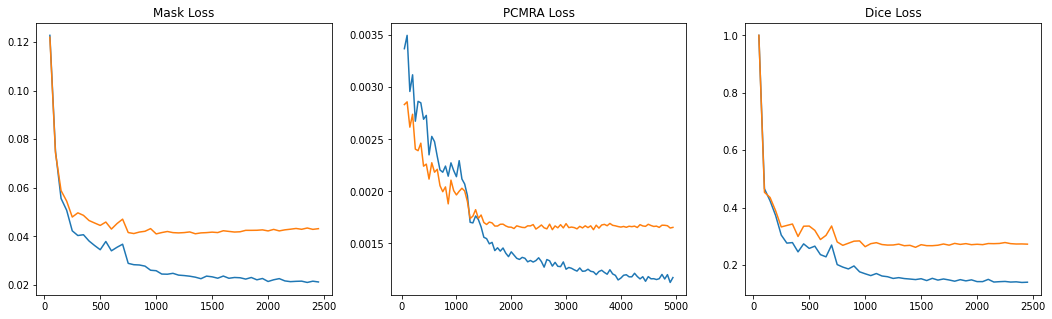






pi-gan 21-05-2021 23:33:42 cnn setup 5 mapping setup 7

pretrained: None
cnn_setup: 5
mapping_setup: 7
rotate: True
translate: True
flip: True
stretch: True
crop: True

Lowest train mask loss at epoch 2350:	0.021134
Lowest eval  mask loss at epoch 1150:	0.041083

Lowest train pcmra loss at epoch 4650:	0.001087
Lowest eval  pcmra loss at epoch 2750:	0.001603

Lowest train dice loss at epoch 2300:	0.139105
Lowest eval  dice loss at epoch 1600:	0.26136


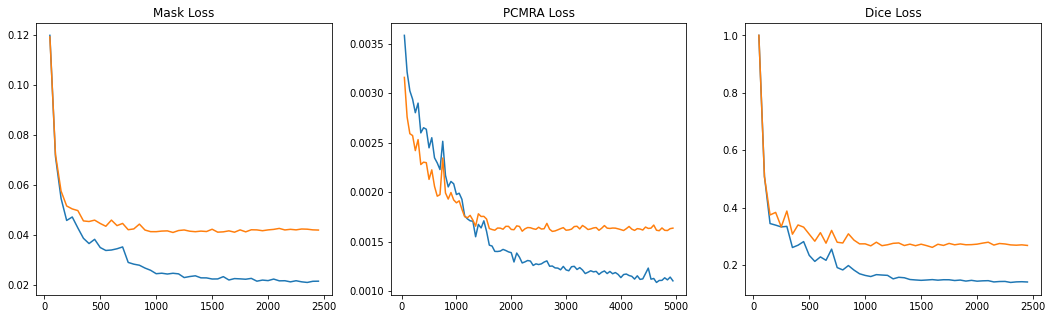






pi-gan 22-05-2021 04:28:59 cnn setup 6 mapping setup 7

pretrained: None
cnn_setup: 6
mapping_setup: 7
rotate: True
translate: True
flip: True
stretch: True
crop: True

Lowest train mask loss at epoch 2300:	0.021304
Lowest eval  mask loss at epoch 1300:	0.039385

Lowest train pcmra loss at epoch 4800:	0.001177
Lowest eval  pcmra loss at epoch 4500:	0.001511

Lowest train dice loss at epoch 2300:	0.141556
Lowest eval  dice loss at epoch 1300:	0.25903


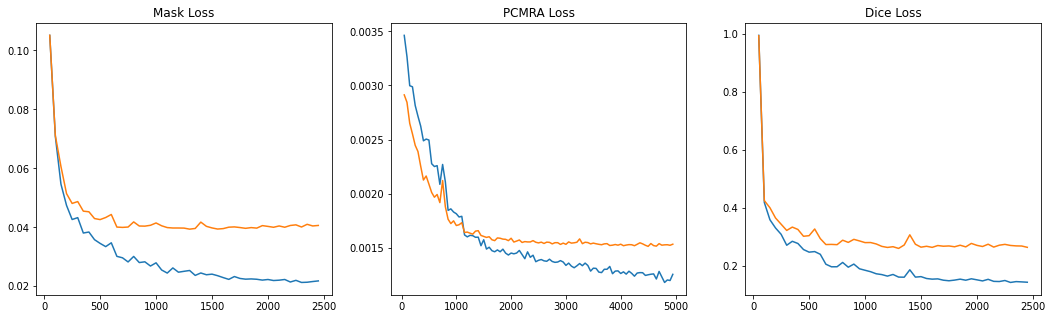






pi-gan 22-05-2021 09:21:36 cnn setup 7 mapping setup 7

pretrained: None
cnn_setup: 7
mapping_setup: 7
rotate: True
translate: True
flip: True
stretch: True
crop: True

Lowest train mask loss at epoch 2200:	0.022172
Lowest eval  mask loss at epoch 1300:	0.03807

Lowest train pcmra loss at epoch 4900:	0.001174
Lowest eval  pcmra loss at epoch 4200:	0.00158

Lowest train dice loss at epoch 2300:	0.148214
Lowest eval  dice loss at epoch 1900:	0.255958


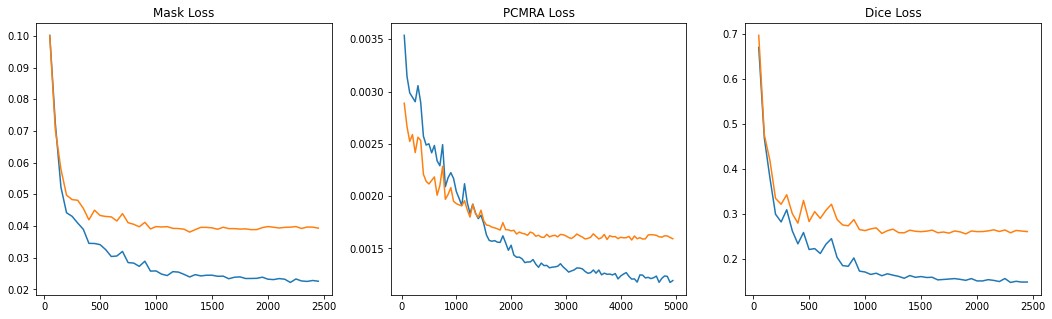






pi-gan 22-05-2021 15:04:31 cnn setup 8 mapping setup 7

pretrained: None
cnn_setup: 8
mapping_setup: 7
rotate: True
translate: True
flip: True
stretch: True
crop: True

Lowest train mask loss at epoch 2350:	0.025588
Lowest eval  mask loss at epoch 2300:	0.043164

Lowest train pcmra loss at epoch 4900:	0.00119
Lowest eval  pcmra loss at epoch 3100:	0.001603

Lowest train dice loss at epoch 2450:	0.176255
Lowest eval  dice loss at epoch 2150:	0.287792


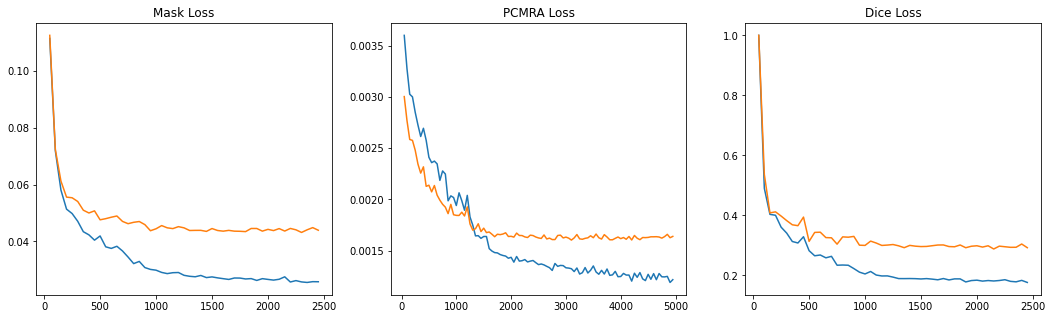






pi-gan 22-05-2021 18:48:27 cnn setup 9 mapping setup 7

pretrained: None
cnn_setup: 9
mapping_setup: 7
rotate: True
translate: True
flip: True
stretch: True
crop: True

Lowest train mask loss at epoch 2450:	0.024204
Lowest eval  mask loss at epoch 1250:	0.04227

Lowest train pcmra loss at epoch 4700:	0.001207
Lowest eval  pcmra loss at epoch 2900:	0.001548

Lowest train dice loss at epoch 2400:	0.168885
Lowest eval  dice loss at epoch 2050:	0.286659


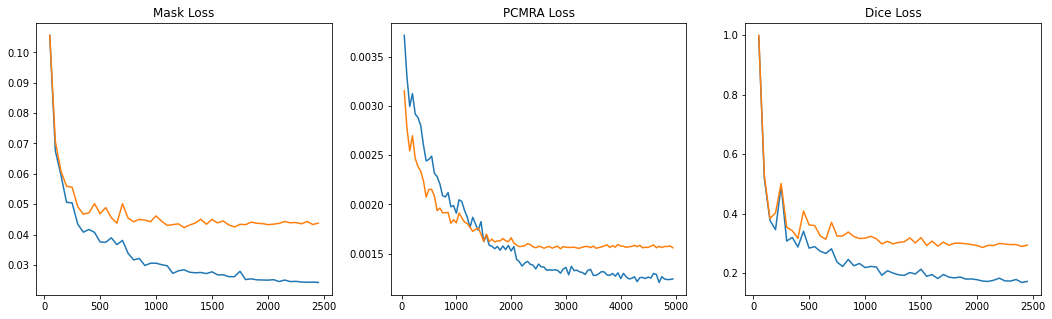






pi-gan 22-05-2021 22:29:28 cnn setup 10 mapping setup 7

pretrained: None
cnn_setup: 10
mapping_setup: 7
rotate: True
translate: True
flip: True
stretch: True
crop: True

Lowest train mask loss at epoch 2350:	0.021273
Lowest eval  mask loss at epoch 1500:	0.04177

Lowest train pcmra loss at epoch 4650:	0.001122
Lowest eval  pcmra loss at epoch 2600:	0.001546

Lowest train dice loss at epoch 2350:	0.140847
Lowest eval  dice loss at epoch 1750:	0.273239


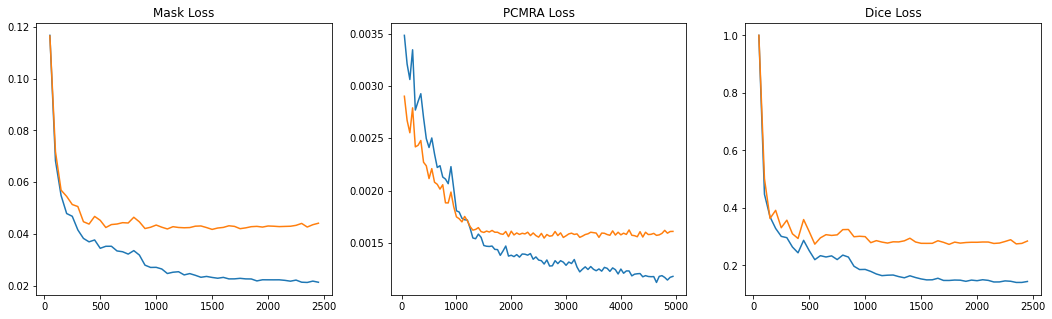






pi-gan 23-05-2021 03:47:35 cnn setup 13 mapping setup 7

pretrained: None
cnn_setup: 13
mapping_setup: 7
rotate: True
translate: True
flip: True
stretch: True
crop: True

Lowest train mask loss at epoch 2350:	0.021449
Lowest eval  mask loss at epoch 1450:	0.03999

Lowest train pcmra loss at epoch 4950:	0.001108
Lowest eval  pcmra loss at epoch 2250:	0.001555

Lowest train dice loss at epoch 2450:	0.141146
Lowest eval  dice loss at epoch 2400:	0.264034


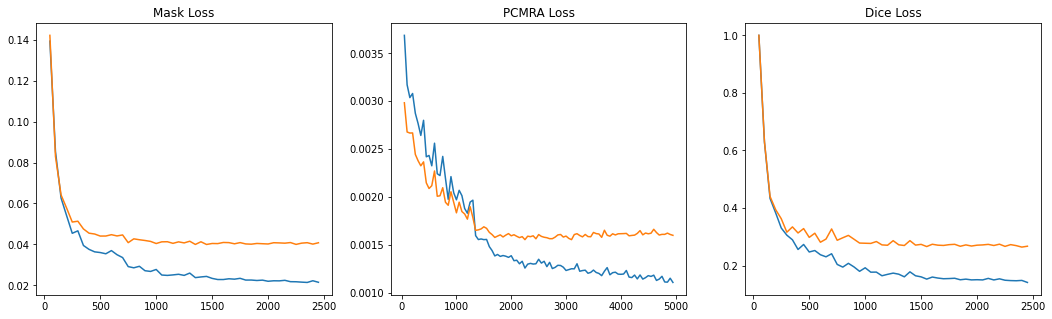






pi-gan 23-05-2021 08:39:43 cnn setup 11 mapping setup 6

pretrained: None
cnn_setup: 11
mapping_setup: 6
rotate: True
translate: True
flip: True
stretch: True
crop: True

Lowest train pcmra loss at epoch 1350:	0.004579
Lowest eval  pcmra loss at epoch 1350:	0.004037



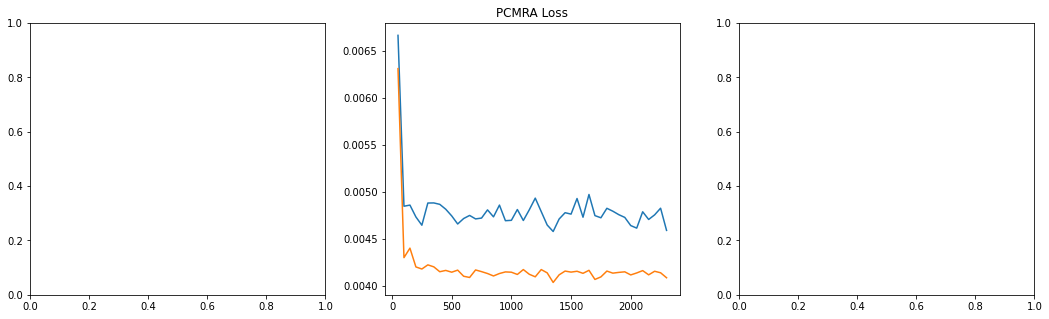






pi-gan 23-05-2021 10:29:06 cnn setup 12 mapping setup 6

pretrained: None
cnn_setup: 12
mapping_setup: 6
rotate: True
translate: True
flip: True
stretch: True
crop: True

Lowest train pcmra loss at epoch 4550:	0.001501
Lowest eval  pcmra loss at epoch 4550:	0.001642



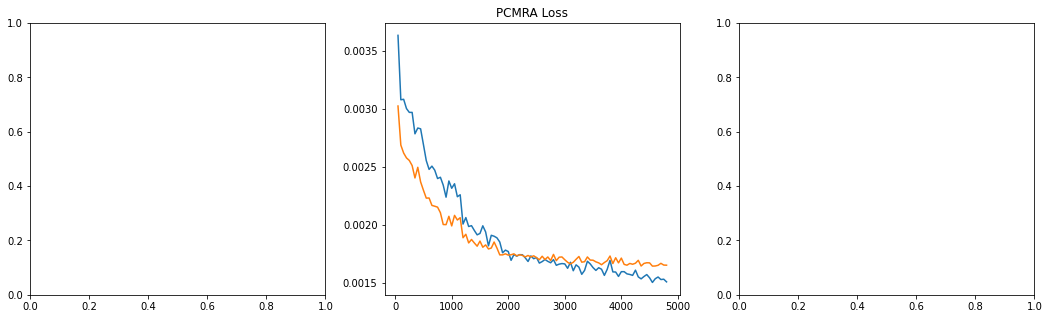






pi-gan 23-05-2021 14:22:41 cnn setup 12 mapping setup 6 continuing

pretrained: pi-gan 23-05-2021 10:29:06 cnn setup 12 mapping setup 6
cnn_setup: 12
mapping_setup: 6
rotate: True
translate: True
flip: True
stretch: True
crop: True

Lowest train mask loss at epoch 2450:	0.026252
Lowest eval  mask loss at epoch 1000:	0.040283

Lowest train pcmra loss at epoch 1300:	0.001452
Lowest eval  pcmra loss at epoch 950:	0.001613

Lowest train dice loss at epoch 2150:	0.180008
Lowest eval  dice loss at epoch 900:	0.275296


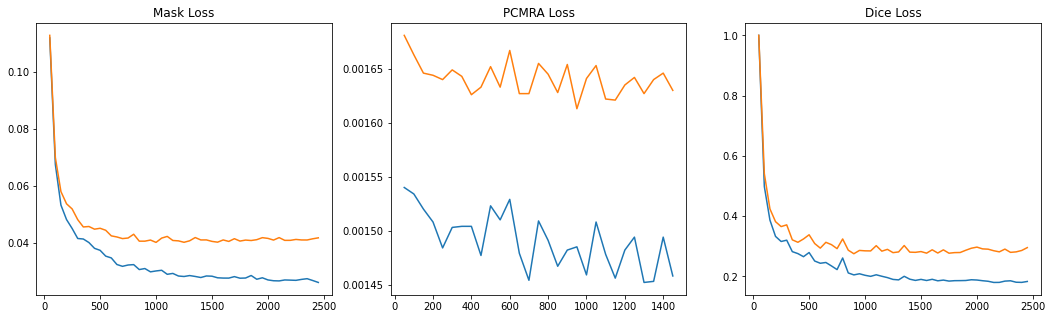






pi-gan 23-05-2021 16:26:08 cnn setup 14 mapping setup 7

pretrained: None
cnn_setup: 14
mapping_setup: 7
rotate: True
translate: True
flip: True
stretch: True
crop: True

Lowest train pcmra loss at epoch 4950:	0.001313
Lowest eval  pcmra loss at epoch 4800:	0.001543



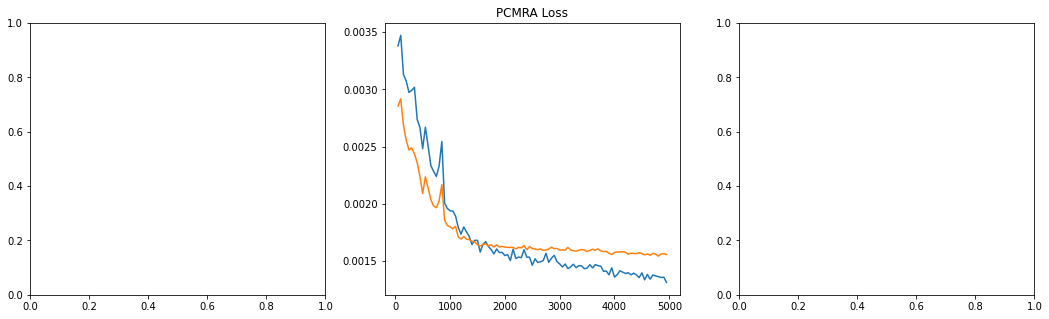






pi-gan 23-05-2021 20:33:49 cnn setup 14 mapping setup 7 continuing

pretrained: pi-gan 23-05-2021 16:26:08 cnn setup 14 mapping setup 7
cnn_setup: 14
mapping_setup: 7
rotate: True
translate: True
flip: True
stretch: True
crop: True

Lowest train mask loss at epoch 2300:	0.023588
Lowest eval  mask loss at epoch 1750:	0.038738

Lowest train pcmra loss at epoch 900:	0.001287
Lowest eval  pcmra loss at epoch 500:	0.001538

Lowest train dice loss at epoch 2300:	0.157579
Lowest eval  dice loss at epoch 1750:	0.2507


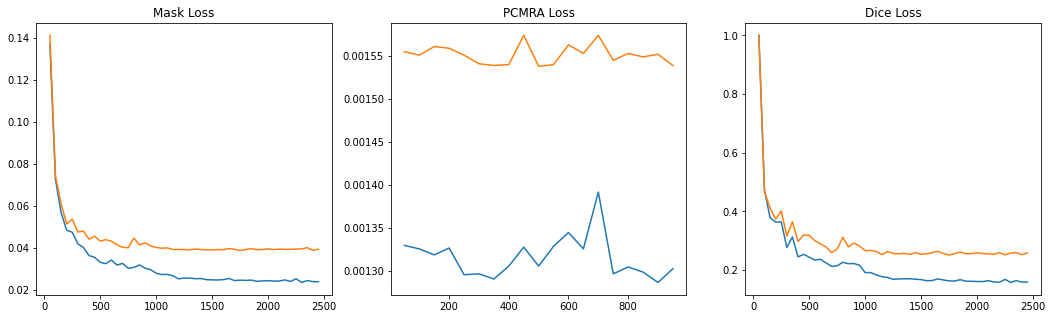






pi-gan 23-05-2021 22:18:32 cnn setup 15 mapping setup 7

pretrained: None
cnn_setup: 15
mapping_setup: 7
rotate: True
translate: True
flip: True
stretch: True
crop: True

Lowest train mask loss at epoch 2450:	0.028645
Lowest eval  mask loss at epoch 2350:	0.041776

Lowest train pcmra loss at epoch 4900:	0.001764
Lowest eval  pcmra loss at epoch 4950:	0.001692

Lowest train dice loss at epoch 2450:	0.201267
Lowest eval  dice loss at epoch 2400:	0.284819


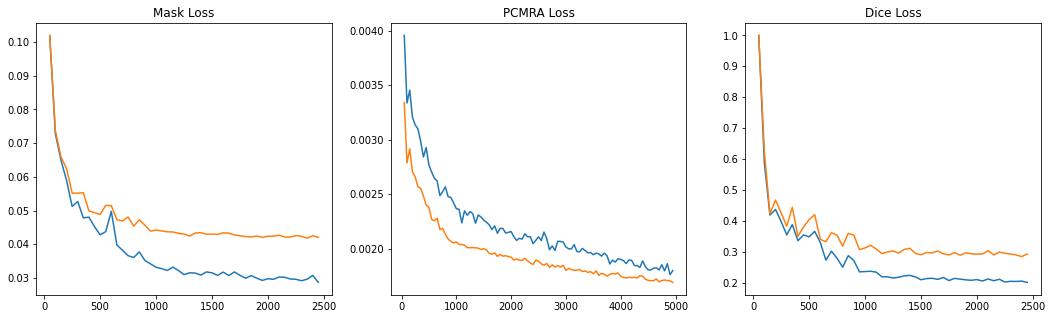






pi-gan 24-05-2021 01:52:31 cnn setup 6 mapping setup 7 with weight decay

pretrained: None
cnn_setup: 6
mapping_setup: 7
rotate: True
translate: True
flip: True
stretch: True
crop: True

Lowest train mask loss at epoch 2350:	0.020779
Lowest eval  mask loss at epoch 1050:	0.038863

Lowest train pcmra loss at epoch 4600:	0.001153
Lowest eval  pcmra loss at epoch 3650:	0.001495

Lowest train dice loss at epoch 2450:	0.133817
Lowest eval  dice loss at epoch 1850:	0.252036


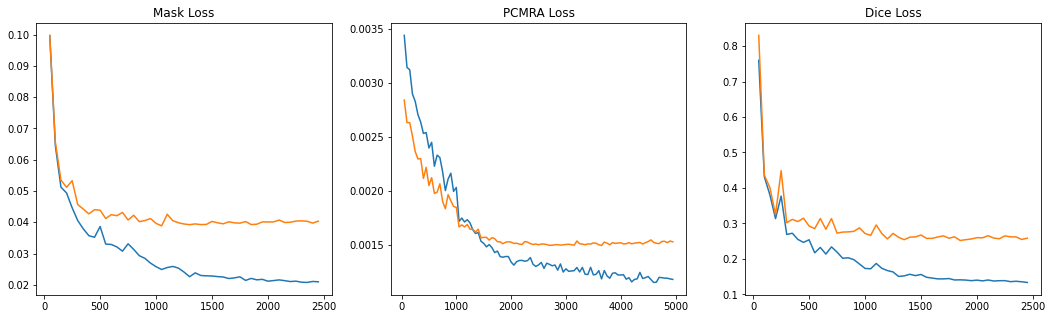






pi-gan 24-05-2021 16:53:49 cnn setup 14 mapping setup 7 weight decay continuing

pretrained: None
cnn_setup: 14
mapping_setup: 7
rotate: True
translate: True
flip: True
stretch: True
crop: True

Lowest train mask loss at epoch 2450:	0.026601
Lowest eval  mask loss at epoch 1750:	0.039272

Lowest train pcmra loss at epoch 4350:	0.001406
Lowest eval  pcmra loss at epoch 4250:	0.00156

Lowest train dice loss at epoch 2000:	0.178143
Lowest eval  dice loss at epoch 1900:	0.262387


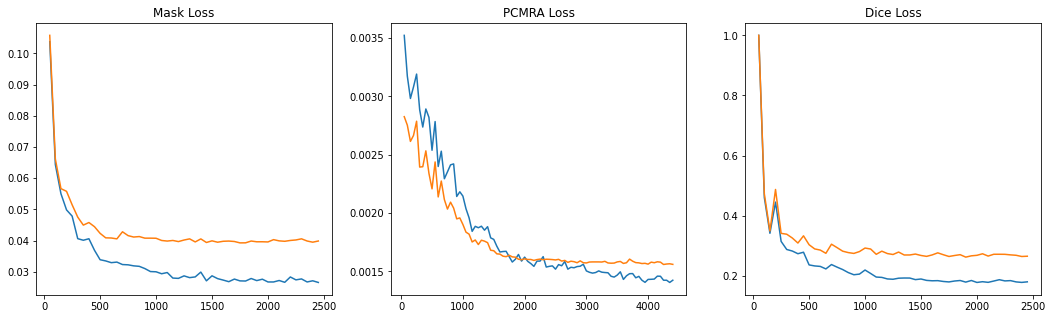






pi-gan 24-05-2021 20:06:39 cnn setup 14 mapping setup 7

pretrained: None
cnn_setup: 14
mapping_setup: 7
rotate: False
translate: False
flip: False
stretch: False
crop: False

Lowest train mask loss at epoch 950:	0.007308
Lowest eval  mask loss at epoch 100:	0.085971

Lowest train pcmra loss at epoch 1450:	0.000584
Lowest eval  pcmra loss at epoch 200:	0.002439

Lowest train dice loss at epoch 950:	0.050211
Lowest eval  dice loss at epoch 800:	0.481962


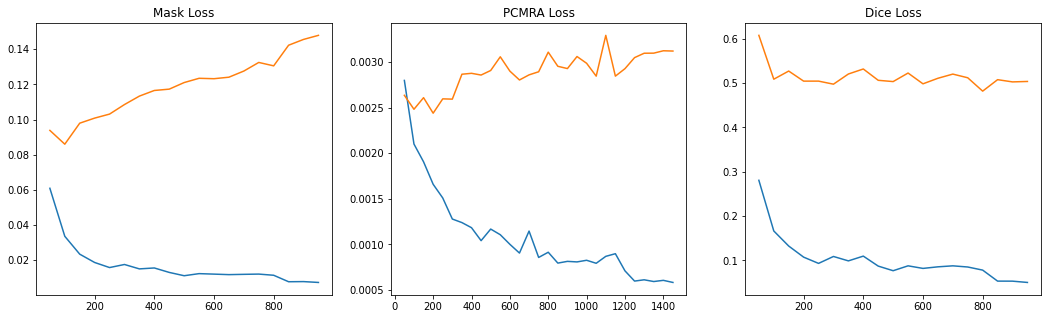






pi-gan 24-05-2021 21:12:38 cnn setup 16 mapping setup 7

pretrained: None
cnn_setup: 16
mapping_setup: 7
rotate: True
translate: True
flip: True
stretch: True
crop: True

Lowest train mask loss at epoch 2300:	0.022741
Lowest eval  mask loss at epoch 1450:	0.039259

Lowest train pcmra loss at epoch 4700:	0.0014
Lowest eval  pcmra loss at epoch 4850:	0.001578

Lowest train dice loss at epoch 2450:	0.153687
Lowest eval  dice loss at epoch 2050:	0.254682


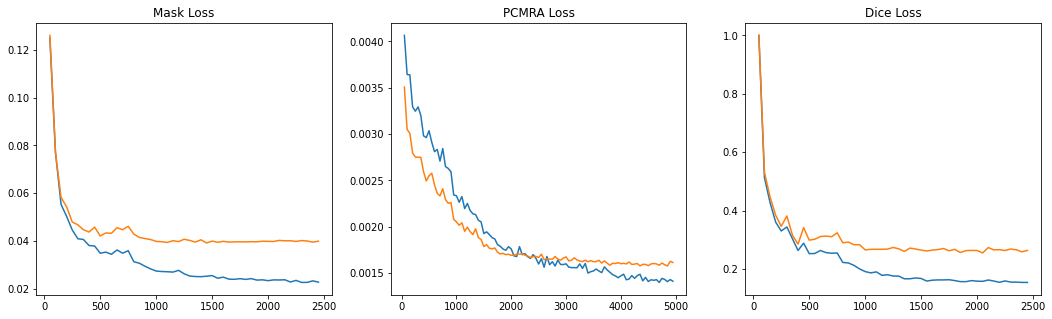






pi-gan 25-05-2021 04:50:07 cnn setup 14 mapping setup 7 weight decay 1e-5 cnn and sirens

pretrained: None
cnn_setup: 14
mapping_setup: 7
rotate: True
translate: True
flip: True
stretch: True
crop: True

Lowest train mask loss at epoch 2300:	0.021493
Lowest eval  mask loss at epoch 1350:	0.036868

Lowest train pcmra loss at epoch 4750:	0.001324
Lowest eval  pcmra loss at epoch 4650:	0.001505

Lowest train dice loss at epoch 2350:	0.14351
Lowest eval  dice loss at epoch 1350:	0.24321


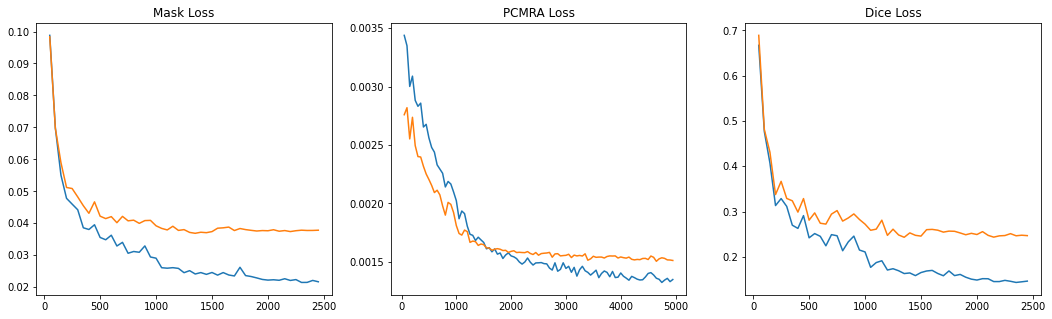

In [7]:
# requirements = {"cnn_setup": 14}
requirements = {}

print_vars = ["pretrained", "cnn_setup", "mapping_setup", "rotate", "translate", "flip", "stretch", "crop"]
# print_vars = None

show_runs(requirements, print_vars, last=None)